# Value-at-risk model

## Overview

Value at Risk (VaR) is a statistical measure that estimates the maximum potential loss of an investment or portfolio over a given time horizon with a certain level of confidence. It is used in finance and banking to help determine the maximum amount of risk the bank can take while maintaining an adequate level of both capital and liquidity, that it needs to meet regulatory requirements and customer demand. This modelling helps to ensure the institution avoids margin calls or having to sell assets prior to their expiry.

## Import required libraries

In this project, we will use the following libraries:
* `yfinance` to download stock data
* `numpy` for mathematical calculations
* `pandas` for data manipulation
* `matplotlib.pyplot` for data visualization
* `scipy.stats` for the normal distribution calculations

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

## Download and plot stock data

In [3]:
# stocks 
stocks = ['YELP', 'UPS', 'AAPL']

# Number of trading days
NUM_TRADING_DAYS = 252

# historical data - define START and END date
start_date = '2014-01-01'
end_date = '2020-01-01'


def download_data(stocks):
    # name of stock (key) - stock values (2012-2019) as values
    stock_data = {}
    
    for stock in stocks:
        # closing prices
        ticker = yf.Ticker(stock)
        stock_data[stock] = ticker.history(start=start_date, end=end_date)['Close']
        
    return pd.DataFrame(stock_data)

def show_data(data):
    data.plot(figsize=(10, 5))
    plt.show()

In [4]:
data = download_data(stocks)

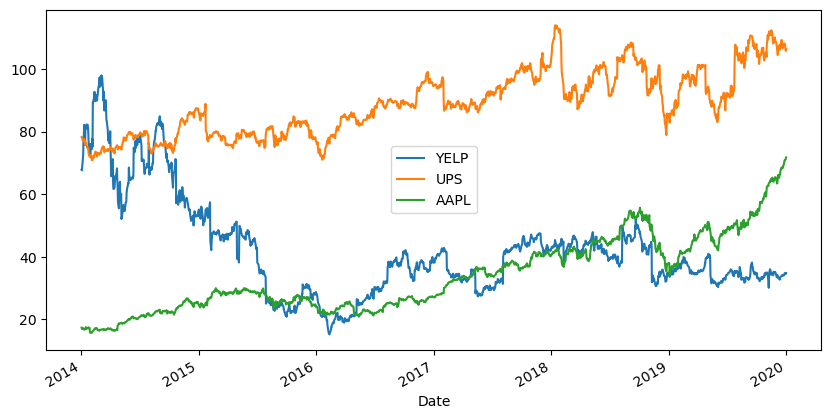

In [5]:
show_data(data)

## Calculate mean and standard deviation

When trying to calculate the value at risk, we need to calculate the mean and standard deviation. To do this, firstly we need to calculate our returns and take the natural logarithm to normalize our data. This is done by `log_returns` function below.

In [6]:
def log_returns(data):
    log_returns = np.log(data/data.shift(1))
    return log_returns[1:]

In [7]:
returns = log_returns(data)

After we have the log returns from our stocks, we can then use the `mean()` and `std()` commands.

In [8]:
def show_statistics(returns):
    # Instead of daily returns we get annual metrics
    mean = returns.mean() * NUM_TRADING_DAYS
    std = returns.std() * NUM_TRADING_DAYS
    return mean, std

In [9]:
mean, std = show_statistics(returns)

## Calculate the Value-at-risk

Now that we have the mean and standard deviation, we can calculate the value-at-risk, which is given by the following equation:

$$
\text{Value at Risk}=\mu\cdot\text{z}\cdot\sigma\cdot\sqrt{h}
$$

Where:
* $\mu$ is the mean.
* $\sigma$ is the standard deviation.
* z is the value drawn the normal distribution, which is dependent on the confidence level selected.
* h is the time horizon, which in this case is given in days.

In [10]:
def VaR(mean, std, h=1, confidence_level=0.95):
    z_score = st.norm.ppf(1 - (1 - confidence_level) / 2)
    VaR = mean * z_score * std * np.sqrt(h)
    return VaR

In [11]:
VaR(mean, std, h=252)

YELP   -28.995707
UPS      4.863223
AAPL    28.498019
dtype: float64